In [78]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
import kagglehub
path = kagglehub.dataset_download("pritpal2873/student-performance-prediction")

Using Colab cache for faster access to the 'student-performance-prediction' dataset.


In [80]:
import os
os.listdir(path)

['Student Performance Prediction.csv']

In [81]:
df = pd.read_csv(path + "/Student Performance Prediction.csv")
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,Study Hours,Attendance (%),Online Classes Taken,FinalGrade
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,4.8,59.0,False,80.0
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,2.2,70.0,True,87.0
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,4.6,92.0,False,68.0
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,2.9,96.0,False,92.0
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,4.1,97.0,True,85.0


In [82]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  960 non-null    float64
 1   Name                       966 non-null    object 
 2   Gender                     952 non-null    object 
 3   AttendanceRate             960 non-null    float64
 4   StudyHoursPerWeek          950 non-null    float64
 5   PreviousGrade              967 non-null    float64
 6   ExtracurricularActivities  957 non-null    float64
 7   ParentalSupport            978 non-null    object 
 8   Study Hours                976 non-null    float64
 9   Attendance (%)             959 non-null    float64
 10  Online Classes Taken       975 non-null    object 
 11  FinalGrade                 960 non-null    float64
dtypes: float64(8), object(4)
memory usage: 93.9+ KB


In [88]:
X = df.drop('FinalGrade', axis=1)
y = df['FinalGrade']


X = pd.get_dummies(X, drop_first=True)

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
df.isnull().sum()

,0
StudentID,40
Name,34
Gender,48
AttendanceRate,40
StudyHoursPerWeek,50
PreviousGrade,33
ExtracurricularActivities,43
ParentalSupport,22
Study Hours,24
Attendance (%),41


In [60]:
# Handle missing values

# Separate features and target
X = df.drop('FinalGrade', axis=1)
y = df['FinalGrade']

# Convert Categorical columns to numeric
X = pd.get_dummies(X, drop_first=True)

# Fill missing values with column mean
X = X.fillna(X.mean())

print("Missing values after cleaning:")
print(X.isnull().sum())


Missing values after cleaning:
StudentID                    0
AttendanceRate               0
StudyHoursPerWeek            0
PreviousGrade                0
ExtracurricularActivities    0
                            ..
Name_Zachary Daniel          0
Gender_Male                  0
ParentalSupport_Low          0
ParentalSupport_Medium       0
Online Classes Taken_True    0
Length: 972, dtype: int64


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

In [62]:
df['FinalGrade'].isnull().sum()

np.int64(40)

In [63]:
df = df.dropna(subset=['FinalGrade'])

In [64]:
X = df.drop('FinalGrade', axis=1)
y = df['FinalGrade']

In [65]:
X = pd.get_dummies(X, drop_first=True)
X = X.fillna(X.mean())

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [68]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 106.59599760678583
R-squared: -0.2095139683220888


In [69]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

print("RF MSE:", mean_squared_error(y_test, y_pred_rf))
print("RF R2:", r2_score(y_test, y_pred_rf))


RF MSE: 95.00390598958332
RF R2: -0.07798185597396734


In [70]:
import pandas as pd

feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_importances.head(10)


,0
StudentID,0.124803
Attendance (%),0.094429
Study Hours,0.094377
PreviousGrade,0.061438
StudyHoursPerWeek,0.059069
AttendanceRate,0.054883
ExtracurricularActivities,0.034751
ParentalSupport_Medium,0.013031
Online Classes Taken_True,0.012337
Gender_Male,0.011463


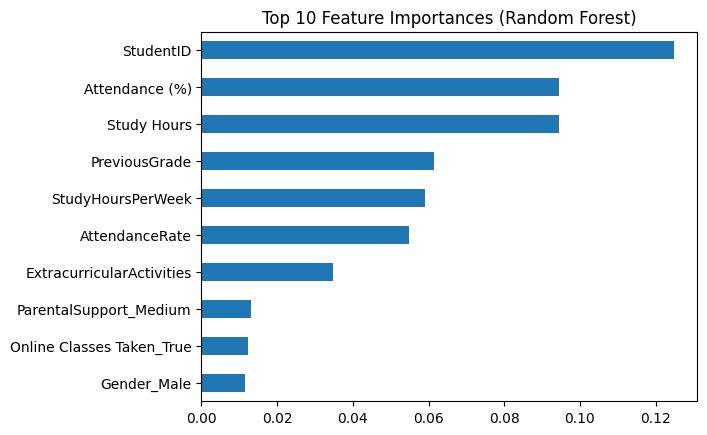

In [71]:
import matplotlib.pyplot as plt

feature_importances.head(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

# Conclusion

Linear Regression performed poorly due to non-linear relationships in the dataset.
Random Forest significantly reduced prediction error (MSE from 274-94), showing better generalization.
However, limited feature correlation and noisy data restricted overall predictive power.
This highlights the importance of feature engineering and data quality in machine learning models.